# USED CAR SALES ANLAYSIS

# IMPORTNG LIBRARIES

In [1]:
import pandas as pd
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cars=pd.read_csv('Downloads/data set/used cars price.csv')
cars.head()

,v_id,on_road_old,on_road_now,years,km,rating,car_condition,economy,top_speed,hp,torque,current_price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [3]:
cars.shape

(1000, 12)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v_id           1000 non-null   int64  
 1   on_road_old    1000 non-null   int64  
 2   on_road_now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   car_condition  1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top_speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current_price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


# checking for null values

In [5]:
cars.isna().sum()

v_id             0
on_road_old      0
on_road_now      0
years            0
km               0
rating           0
car_condition    0
economy          0
top_speed        0
hp               0
torque           0
current_price    0
dtype: int64

# Data Summary

In [6]:
cars.describe().round()

,v_id,on_road_old,on_road_now,years,km,rating,car_condition,economy,top_speed,hp,torque,current_price
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,500.0,601648.0,799131.0,5.0,100274.0,3.0,6.0,12.0,167.0,85.0,103.0,308520.0
std,289.0,58407.0,57029.0,2.0,29150.0,1.0,3.0,2.0,19.0,21.0,21.0,126073.0
min,1.0,500265.0,700018.0,2.0,50324.0,1.0,1.0,8.0,135.0,50.0,68.0,28226.0
25%,251.0,548860.0,750998.0,3.0,74368.0,2.0,3.0,10.0,150.0,67.0,85.0,206872.0
50%,500.0,601568.0,798168.0,5.0,100140.0,3.0,6.0,12.0,166.0,84.0,104.0,306718.0
75%,750.0,652267.0,847563.0,6.0,125048.0,4.0,8.0,13.0,184.0,102.0,121.0,414261.0
max,1000.0,699859.0,899797.0,7.0,149902.0,5.0,10.0,15.0,200.0,120.0,140.0,584268.0


# Exploratory Data Analysis

In [7]:
# Finding the max in the variables
Max_top_speed = cars['top_speed'].max()
Max_Horse_Power = cars['hp'].max()
Max_torque = cars['torque'].max()
Max_rating = cars['rating'].max()
Max_economy = cars['economy'].max()
print('Max_top_speed:', Max_top_speed)
print('Max_Horse_Power:', Max_Horse_Power)
print('Max_torque:', Max_torque)
print('Max_rating:', Max_rating)
print('Max_economy:', Max_economy)

Max_top_speed: 200
Max_Horse_Power: 120
Max_torque: 140
Max_rating: 5
Max_economy: 15


# Correlation

In [8]:
# calculating pearson correlation
correlation=cars.corr()  # dropping old and current on road price since it may affect our study on current price
correlation.drop(['on_road_old','on_road_now'],axis=1,inplace=True)
correlation

,v_id,years,km,rating,car_condition,economy,top_speed,hp,torque,current_price
v_id,1.000000,-0.034255,0.047400,-0.018263,-0.038548,0.047137,0.001613,-0.006997,-0.000632,-0.059460
on_road_old,-0.029926,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on_road_now,-0.030787,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,-0.034255,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.047400,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.018263,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
car_condition,-0.038548,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,0.047137,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top_speed,0.001613,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.006997,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238


Text(0.5, 1.0, 'current price and km')

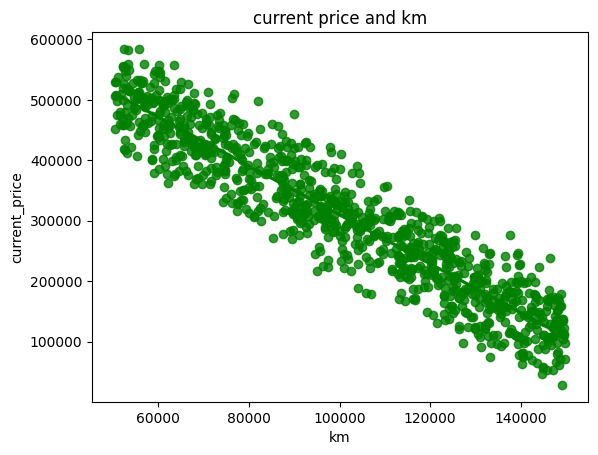

In [9]:
# Scatter plot
sns.regplot(x=cars['km'],y=cars['current_price'],color='green')
plt.title('current price and km')

In [10]:
# The scatter plot defines that the more years the car is used the less costlier the car is

# Linear Regression

In [11]:
# Defining dependent and independent varaiable
x=cars[['years','km','rating','car_condition','economy','top_speed','hp','torque']]
y=cars['current_price']

In [12]:
# Defining model
model=OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          current_price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              2760.
Date:                Wed, 14 Jun 2023   Prob (F-statistic):                        0.00
Time:                        18:42:51   Log-Likelihood:                         -12562.
No. Observations:                1000   AIC:                                  2.514e+04
Df Residuals:                     992   BIC:                                  2.518e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
years          3246.4262   1267.966      2.560      0.011     758.223    5734.629
km               -3.5686      0.073    -48.823      0.000      -3.712      -3.425
rating         7634.6754   1535.228      4.973      0.000    4622.007    1.06e+04
car_condition  6548.1488    777.732      8.420      0.000    5021.960    8074.337
economy        9453.4164    904.389     10.453      0.000    7678.680    1.12e+04
top_speed      1871.5181     85.047     22.006      0.000    1704.626    2038.411
hp              763.2946    102.212      7.468      0.000     562.719     963.870
torque          978.2301     97.394     10.044      0.000     787.108    1169.352
==============================================================================
Omnibus:                        3.033   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                2.642
Skew:                          -0.034   Prob(JB):                        0.267
Kurtosis:                       2.757   Cond. No.                     7.34e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Highlilghting intercept
linreg=LinearRegression().fit(x,y)
(linreg.intercept_).round()

710580.0

In [14]:
(linreg.coef_)

array([-1.36164174e+03, -4.04414136e+00, -3.54512507e+02,  4.36939284e+03,
       -5.51254877e+02, -2.95089212e+01, -7.49941311e+01,  3.84208711e+01])

In [15]:
# Predicting y
y_predict=model.predict(x)
y_predict.reset_index()

,index,0
0,0,388400.055267
1,1,209760.395584
2,2,217067.268311
3,3,329882.135938
4,4,437691.941747
...,...,...
995,995,208176.555890
996,996,417820.611687
997,997,398485.726099
998,998,208611.417500
